### EMR Notebooks Demo

* Installing notebook-scoped Python libraries on a running cluster directly via an EMR Notebook.
* Visualizing Spark dataframes by plotting variety of charts using `%matplot`, `%%display` magics.

Reference: https://aws.amazon.com/blogs/big-data/install-python-libraries-on-a-running-cluster-with-emr-notebooks/

#### Let us first start the Spark session on the notebook,

In [1]:
print("Welcome to my EMR Notebook!")

VBox()

Starting Spark application


ID,YARN Application ID,Kind,State,Spark UI,Driver log,Current session?
12,application_1572035742524_0014,pyspark,idle,Link,Link,✔


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

SparkSession available as 'spark'.


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Welcome to my EMR Notebook!

#### Benefits of using notebook-scoped libraries:

 * Runtime Installation
 * Handles Transitive Dependencies
 * Dependency Isolation
 * Portable library environment

#### Before we import and install libraries on the cluster, let us see the library packages already pre-installed and available to us on the cluster. 

In [2]:
sc.list_packages()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Package                    Version
-------------------------- -------
beautifulsoup4             4.8.0  
boto                       2.49.0 
jmespath                   0.9.4  
lxml                       4.4.1  
mysqlclient                1.4.4  
nltk                       3.4.5  
nose                       1.3.4  
numpy                      1.14.5 
pip                        19.3.1 
py-dateutil                2.2    
python36-sagemaker-pyspark 1.2.4  
pytz                       2019.2 
PyYAML                     3.11   
setuptools                 41.6.0 
six                        1.12.0 
soupsieve                  1.9.3  
wheel                      0.33.6 
windmill                   1.6

#### Now let us load the Amazon customer reviews data for books into Spark data frame,

In [3]:
df = spark.read.parquet('s3://amazon-reviews-pds/parquet/product_category=Books/*.parquet')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

#### Let's determine the schema and number of available columns in the dataset

In [4]:
print(f'Total Columns: {len(df.dtypes)}')
df.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Total Columns: 15
root
 |-- marketplace: string (nullable = true)
 |-- customer_id: string (nullable = true)
 |-- review_id: string (nullable = true)
 |-- product_id: string (nullable = true)
 |-- product_parent: string (nullable = true)
 |-- product_title: string (nullable = true)
 |-- star_rating: integer (nullable = true)
 |-- helpful_votes: integer (nullable = true)
 |-- total_votes: integer (nullable = true)
 |-- vine: string (nullable = true)
 |-- verified_purchase: string (nullable = true)
 |-- review_headline: string (nullable = true)
 |-- review_body: string (nullable = true)
 |-- review_date: date (nullable = true)
 |-- year: integer (nullable = true)

#### Let's check total rows and number of books available in the given dataset

In [6]:
print(f'Total Rows: {df.count():,}')
num_of_books = df.select('product_id').distinct().count()
print(f'Number of Books: {num_of_books:,}')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Total Rows: 20,726,160
Number of Books: 3,423,743

#### Let's install Python libraries from PyPI repository
Let's analyze the number of book reviews by year and find the distribution of customer ratings. To do this, import the `pandas` library version 0.25.1 and the latest `matplotlib` library from the public PyPI repository. Install them on the cluster attached to your notebook using the install_pypi_package API.

In [8]:
sc.install_pypi_package("pandas==0.25.1") #Install pandas version 0.25.1 
sc.install_pypi_package("matplotlib", "https://pypi.org/simple") #Install matplotlib from given PyPI repository

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

#### Let’s verify whether our imported packages have been successfully installed

In [11]:
sc.list_packages()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Package                    Version
-------------------------- -------
beautifulsoup4             4.8.0  
boto                       2.49.0 
cycler                     0.10.0 
jmespath                   0.9.4  
kiwisolver                 1.1.0  
lxml                       4.4.1  
matplotlib                 3.1.1  
mysqlclient                1.4.4  
nltk                       3.4.5  
nose                       1.3.4  
numpy                      1.14.5 
pandas                     0.25.1 
pip                        19.3.1 
py-dateutil                2.2    
pyparsing                  2.4.5  
python-dateutil            2.8.1  
python36-sagemaker-pyspark 1.2.4  
pytz                       2019.2 
PyYAML                     3.11   
setuptools                 41.6.0 
six                        1.12.0 
soupsieve                  1.9.3  
wheel                      0.33.6 
windmill                   1.6

#### Let’s find out the trend for number of reviews across years,

In [12]:
num_of_reviews_by_year = df.groupBy('year').count().orderBy('year').toPandas()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

#### Let’s visualize the trend using `%matplot` magic

In [13]:
import matplotlib.pyplot as plt
plt.clf()
num_of_reviews_by_year.plot(kind='area', x='year',y='count', rot=70, color='#bc5090', legend=None, figsize=(8,6))
plt.xticks(num_of_reviews_by_year.year)
plt.xlim(1995, 2015)
plt.title('Number of reviews across years')
plt.xlabel('Year')
plt.ylabel('Number of Reviews')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Text(0, 0.5, 'Number of Reviews')

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

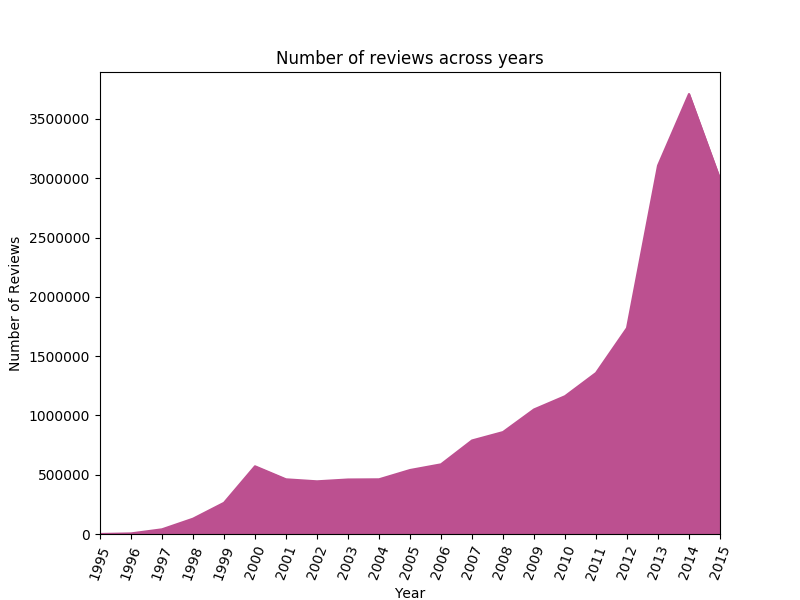

In [14]:
%matplot plt

#### Finally, let's uninstall the package using ‘*uninstall_package*’ Pyspark API

In [15]:
sc.uninstall_package('pandas')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Uninstalling pandas-0.25.1:
  Successfully uninstalled pandas-0.25.1

In [16]:
sc.list_packages()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Package                    Version
-------------------------- -------
beautifulsoup4             4.8.0  
boto                       2.49.0 
cycler                     0.10.0 
jmespath                   0.9.4  
kiwisolver                 1.1.0  
lxml                       4.4.1  
matplotlib                 3.1.1  
mysqlclient                1.4.4  
nltk                       3.4.5  
nose                       1.3.4  
numpy                      1.14.5 
pip                        19.3.1 
py-dateutil                2.2    
pyparsing                  2.4.5  
python-dateutil            2.8.1  
python36-sagemaker-pyspark 1.2.4  
pytz                       2019.2 
PyYAML                     3.11   
setuptools                 41.6.0 
six                        1.12.0 
soupsieve                  1.9.3  
wheel                      0.33.6 
windmill                   1.6

#### Exploring dataframes using `%%display` magic 
Let's analyze the distribution of star ratings and visualize it using a pie chart.

In [ ]:
%%display
df.groupBy('star_rating').count().orderBy('count')